In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Obtendo o dado

In [186]:
data = np.array([
    [1, 84, 46, 354],
    [2, 73, 20, 190],
    [3, 65, 52, 405],
    [4, 70, 30, 263],
    [5, 76, 57, 451],
    [6, 69, 25, 302],
    [7, 63, 28, 288],
    [8, 72, 36, 385],
    [9, 79, 57, 402],
    [10, 75, 44, 365],
    [11, 27, 24, 209],
    [12, 89, 31, 290],
    [13, 65, 52, 346],
    [14, 57, 23, 254],
    [15, 59, 60, 395],
    [16, 69, 48, 434],
    [17, 60, 34, 220],
    [18, 79, 51, 374],
    [19, 75, 50, 308],
    [20, 82, 34, 220],
    [21, 59, 46, 311],
    [22, 67, 23, 181],
    [23, 85, 37, 274],
    [24, 55, 40, 303],
    [25, 63, 30, 244]
])

In [187]:
df = pd.DataFrame(data)

In [188]:
df.head(5)

,0,1,2,3
0,1,84,46,354
1,2,73,20,190
2,3,65,52,405
3,4,70,30,263
4,5,76,57,451


In [189]:
df = df.rename(columns={1: 'Peso (Kg)', 2: 'Idade (anos)', 3: 'Taxa de Gordura no sangue'})
df.drop(columns=[0], inplace=True)

In [190]:
df.head(5)

,Peso (Kg),Idade (anos),Taxa de Gordura no sangue
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451


### Entendendo o dado

In [191]:
df.describe()

,Peso (Kg),Idade (anos),Taxa de Gordura no sangue
count,25.000000,25.000000,25.00000
mean,68.680000,39.120000,310.72000
std,12.727005,12.248537,77.82915
min,27.000000,20.000000,181.00000
25%,63.000000,30.000000,254.00000
50%,69.000000,37.000000,303.00000
75%,76.000000,50.000000,374.00000
max,89.000000,60.000000,451.00000


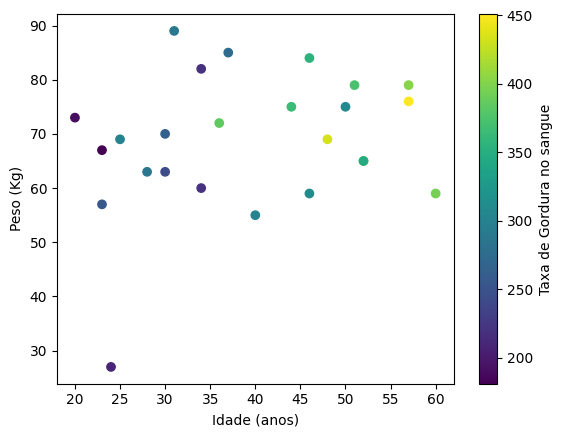

In [192]:
plt.scatter(df['Idade (anos)'], df['Peso (Kg)'], c=df['Taxa de Gordura no sangue'], cmap='viridis')
plt.xlabel('Idade (anos)')
plt.ylabel('Peso (Kg)')
plt.colorbar(label='Taxa de Gordura no sangue')
plt.show()

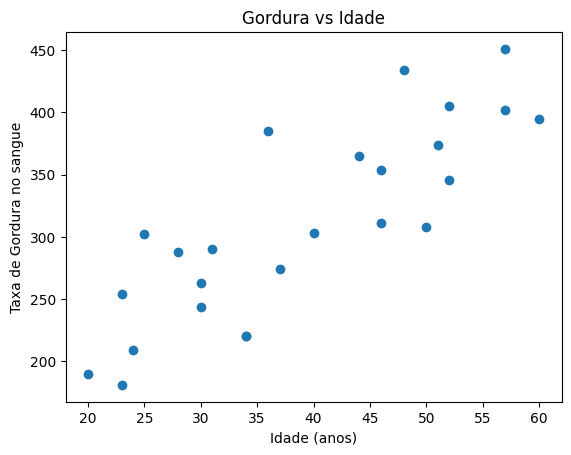

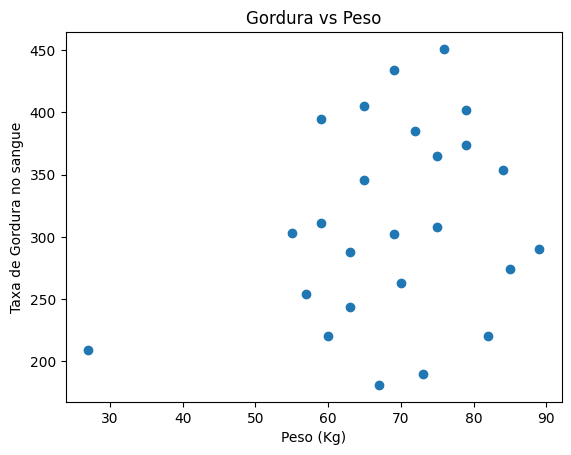

In [193]:
plt.scatter(df['Idade (anos)'], df['Taxa de Gordura no sangue'])
plt.xlabel('Idade (anos)')
plt.ylabel('Taxa de Gordura no sangue')
plt.title('Gordura vs Idade')
plt.show()

plt.scatter(df['Peso (Kg)'], df['Taxa de Gordura no sangue'])
plt.xlabel('Peso (Kg)')
plt.ylabel('Taxa de Gordura no sangue')
plt.title('Gordura vs Peso')
plt.show()


##### Como podemos analisar acima, a idade aparenta estar muito mais relacionado com a taxa de gordura do que o peso


### Ajustando o dado

In [208]:
# Para realizar o estudo, vou separar o dado em treino e teste, para poder validar os diferentes metodos utilizados
X = df.drop('Taxa de Gordura no sangue', axis=1)
y = df['Taxa de Gordura no sangue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", y_train.shape)
print("Testing set shape:", X_test.shape)
print("Testing set shape:", y_test.shape)


Training set shape: (20, 2)
Testing set shape: (20,)
Testing set shape: (5, 2)
Testing set shape: (5,)


In [209]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [210]:
X_test

array([[79, 57],
       [60, 34],
       [84, 46],
       [55, 40],
       [89, 31]])

In [211]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    
def validate_y_pred(X,y_test,y_pred,title=''):
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("Mean squared error: %.2f" % mse)
    print('R2: %.2f' % r2)
    print('Mean Absolute Error: %.2f' % mae)


    plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')
    plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')

    plt.ylabel('Idade (anos)')
    plt.xlabel('Row Number')
    plt.title(f'Actual vs Predicted {title}')
    plt.legend()
    plt.show()


def plot_weights(w,X,y):
    plt.scatter(X[:,1], y)
    area = np.linspace(X[:,1].min(), X[:,1].max(), 2)
    y_area = w[1]*area + w[0]

    plt.plot(area,y_area, color = 'crimson',linewidth = 3)
    plt.xlabel('Idade (anos)')
    plt.ylabel('Taxa de Gordura no sangue')
    plt.title('Reta dos Pesos')
    plt.show()
    
def get_y_pred(X,w):
    if X.shape[1] != len(w):
        X = np.insert(X, 0, 1, axis=1)
    y_pred = np.dot(X, w)
    return y_pred

### Obtendo os pesos

##### Invertendo a Matriz
Mesmo sendo uma pratica considerada ineficaz, 
vou obter os pesos primeiramente pelo metodo que inverte a matriz apenas para testar as funcoes de predicao
e assim comparar os resultados quando obter pelo gradiente descendente

In [212]:
def get_weights_EN(X_train, y_train):
    return np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [213]:
pesos_EN = get_weights_EN(X_train, y_train)
pesos_EN

array([1.32573598, 5.65581757])

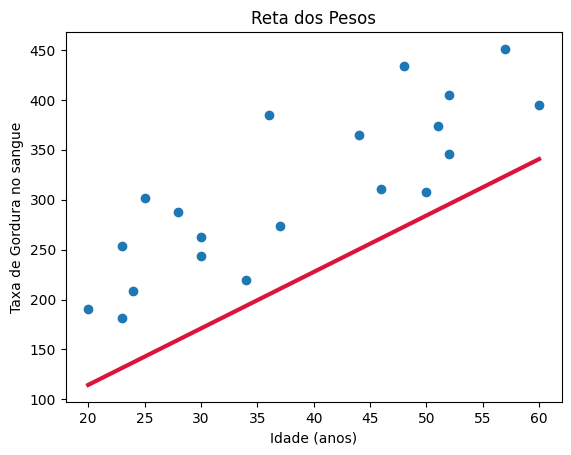

In [214]:
plot_weights(pesos_EN,X_train,y_train)

In [215]:
y_pred_EN = get_y_pred(X_test,pesos_EN)
y_pred_EN

array([427.1147436 , 271.84195597, 371.52943025, 299.14818148,
       293.32084664])

Mean squared error: 730.30
R2: 0.81
Mean Absolute Error: 20.33


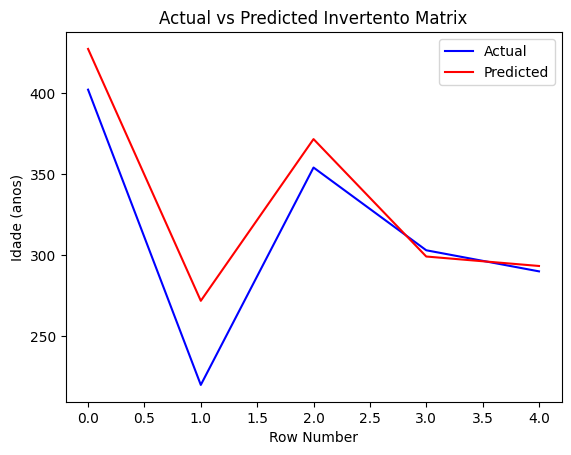

In [216]:
validate_y_pred(X_test,y_test,y_pred_EN, title='Invertento Matrix')

##### Usando Gradiente Descendente

Pelo que entendi a funcao para prever o valor da taxa de gordura seria $$ \hat{y} = w_0 + w_1 \cdot \text{Peso} + w_2 \cdot \text{Idade}$$

E para encontrar os pesos usamos o $$\text{EQM} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1 \cdot Peso_{i} + w_2 \cdot Idade_{i}))^2$$

E a derivada parcial de cada um dos pesos mostra como a mudanca daquele peso afeta o erro

- Derivada do EQM em relação a `w0`:
  $$ \frac{\partial \text{EQM}}{\partial w_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1 \cdot x_{i1} + w_2 \cdot x_{i2})) $$

- Derivada do EQM em relação a `w1`:
  $$ \frac{\partial \text{EQM}}{\partial w_1} = -\frac{2}{n} \sum_{i=1}^{n} x_{i1}(y_i - (w_0 + w_1 \cdot x_{i1} + w_2 \cdot x_{i2})) $$

- Derivada do EQM em relação a `w2`:
  $$ \frac{\partial \text{EQM}}{\partial w_2} = -\frac{2}{n} \sum_{i=1}^{n} x_{i2}(y_i - (w_0 + w_1 \cdot x_{i1} + w_2 \cdot x_{i2})) $$



In [217]:

def calcula_y_pred(X,w):
    #calcula o valor de y para um dado X e w
    return w[0] + w[1]*X[0] + w[2]*X[1]

def calcula_derivada_parcial_EQM(X,y,w,current_iter,wi):
    #calcula a derivada parcial da função de erro quadratico médio em relação ao peso w0
    #para um dado X, y e w
    print(f"i={current_iter} wi={wi}")
    wi = X[wi] if wi != 0 else 1
    somatoria = 0
    for x, yi in zip(X,y):
        somatoria +=  yi - calcula_y_pred(x,w)

    print(f"pesos={w}: erro={somatoria * (-2) / len(X)}")
    
    return somatoria * (-2) / len(X)

def calcula_pesos_com_gradiente_descendente(alpha,n_iter,me,X,y):
    #calcula os pesos da regressão linear com gradiente descendente
    w = np.zeros(3)
    for i in range(n_iter):
        olds = w.copy()
        w[0] -= alpha * calcula_derivada_parcial_EQM(X,y,w,i,0)
        w[1] -= alpha * calcula_derivada_parcial_EQM(X,y,w,i,1)
        w[2] -= alpha * calcula_derivada_parcial_EQM(X,y,w,i,2)
        diference = 0
        for i,j in zip(olds,w):
            diference += abs(i-j)
        if diference < me: return w  
        print(f"-------------------")
    return w

In [218]:
pesos = calcula_pesos_com_gradiente_descendente(0.01,1000,1e-9,X_train,y_train)

i=0 wi=0
pesos=[0. 0. 0.]: erro=-619.9
i=0 wi=1
pesos=[6.199 0.    0.   ]: erro=-607.5020000000002
i=0 wi=2
pesos=[6.199   6.07502 0.     ]: erro=212.62570000000028
-------------------
i=1 wi=0
pesos=[ 6.199     6.07502  -2.126257]: erro=48.903911000000065
i=1 wi=1
pesos=[ 5.70996089  6.07502    -2.126257  ]: erro=47.925832780000036
i=1 wi=2
pesos=[ 5.70996089  5.59576167 -2.126257  ]: erro=-16.774041473
-------------------
i=2 wi=0
pesos=[ 5.70996089  5.59576167 -1.95851659]: erro=-3.8580295387900008
i=2 wi=1
pesos=[ 5.74854119  5.59576167 -1.95851659]: erro=-3.7808689480141595
i=2 wi=2
pesos=[ 5.74854119  5.63357036 -1.95851659]: erro=1.3233041318049488
-------------------
i=3 wi=0
pesos=[ 5.74854119  5.63357036 -1.97174963]: erro=0.3043599503151313
i=3 wi=1
pesos=[ 5.74549759  5.63357036 -1.97174963]: erro=0.29827275130881503
i=3 wi=2
pesos=[ 5.74549759  5.63058763 -1.97174963]: erro=-0.10439546295814636
-------------------
i=4 wi=0
pesos=[ 5.74549759  5.63058763 -1.97070567]: erro=

In [219]:
y_pred = get_y_pred(X_test,pesos)

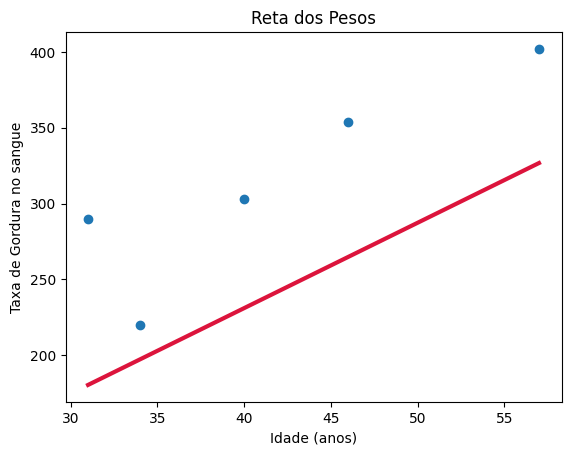

In [220]:
plot_weights(pesos,X_test,y_test)

Mean squared error: 7421.49
R2: -0.97
Mean Absolute Error: 75.32


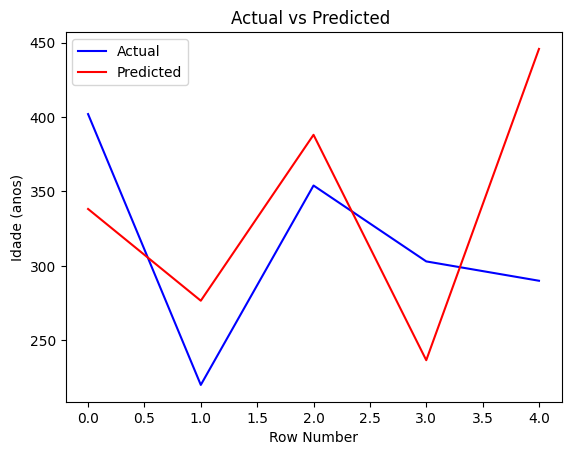

In [221]:
validate_y_pred(X_test,y_test,y_pred)

#### Utilizando Momentum


In [224]:
def calcula_pesos_com_gradiente_descendente_momentum(alpha,beta,n_iter,me,X,y):
    #calcula os pesos da regressão linear com gradiente descendente
    w = np.zeros(3)
    mom = np.zeros(3)
    for i in range(n_iter):
        olds = w.copy()
        w[0] -= alpha * calcula_derivada_parcial_EQM(X,y,w,i,0)
        w[1] -= alpha * calcula_derivada_parcial_EQM(X,y,w,i,1)
        w[2] -= alpha * calcula_derivada_parcial_EQM(X,y,w,i,2)
        diference = 0
        for i,j in zip(olds,w):
            diference += abs(i-j)
        if diference < me: return w  
        print(f"-------------------")
    return w

In [225]:
pesos_momentum = calcula_pesos_com_gradiente_descendente_momentum(0.01, 0.9, 1000, 1e-9, X_train, y_train)

i=0 wi=0
pesos=[0. 0. 0.]: erro=-619.9
i=0 wi=1
pesos=[6.199 0.    0.   ]: erro=-607.5020000000002
i=0 wi=2
pesos=[6.199   6.07502 0.     ]: erro=212.62570000000028
-------------------
i=1 wi=0
pesos=[ 6.199     6.07502  -2.126257]: erro=48.903911000000065
i=1 wi=1
pesos=[ 5.70996089  6.07502    -2.126257  ]: erro=47.925832780000036
i=1 wi=2
pesos=[ 5.70996089  5.59576167 -2.126257  ]: erro=-16.774041473
-------------------
i=2 wi=0
pesos=[ 5.70996089  5.59576167 -1.95851659]: erro=-3.8580295387900008
i=2 wi=1
pesos=[ 5.74854119  5.59576167 -1.95851659]: erro=-3.7808689480141595
i=2 wi=2
pesos=[ 5.74854119  5.63357036 -1.95851659]: erro=1.3233041318049488
-------------------
i=3 wi=0
pesos=[ 5.74854119  5.63357036 -1.97174963]: erro=0.3043599503151313
i=3 wi=1
pesos=[ 5.74549759  5.63357036 -1.97174963]: erro=0.29827275130881503
i=3 wi=2
pesos=[ 5.74549759  5.63058763 -1.97174963]: erro=-0.10439546295814636
-------------------
i=4 wi=0
pesos=[ 5.74549759  5.63058763 -1.97070567]: erro=